# LCA & Neural Attractors

In [1]:
from ADMCode import neural
from ADMCode import visualize as vis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=1.3)

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.savefig.dpi = 150
clrs = ['#3778bf', '#e74c3c', '#9b59b6', '#319455', '#feb308', '#fd7f23']

# Parameter definitions

**$I_{i}$** : Input stregth (choice i)

**$I_{0}$** : Background excitabiltiy (shared across all $i$)

**$k$** : recurrent feedback (self inputs)

* leak if $k<0$ (as in LCA)
* recurrent excitation if $k>0$ (as in Attractor Networks)

**$B$**: cross inhibition ($B<0$)

**$Z$**: shared threshold

**$dt$**: timestep

**$\tau$** (tau) : timeconstant

**$\sigma$** (si) : noise scalar


# Leaky Competing Accumulator (LCA)

#### Competitive accumulation of evidence $X_i(t)$:

## $ d X_1(t) = [I_1 - kX_1(t) - \beta X_2(t)]dt/\tau + \sigma dW_1(t)$

## $ d X_2(t) = [I_2 - kX_2(t) - \beta X_1(t)]dt/\tau + \sigma dW_2(t)$

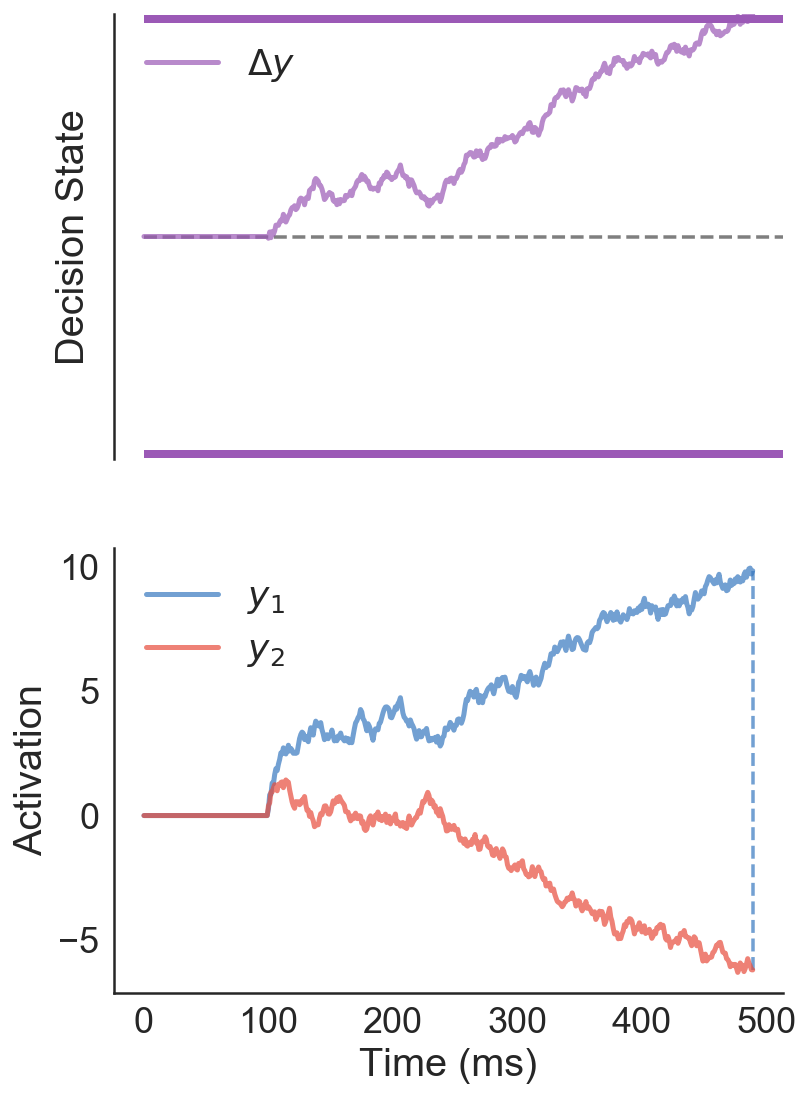

In [2]:
y1, y2, rt, act = neural.LCA_Model(I1=4.5, I2=2., k=5, B=5, Z=10, dt=.001, tau=.05, si=4)
dv = (y1-y2)/np.sqrt(2)
neural.plot_decision_dynamics(y1, y2, dv, Z=dv.max(), label='lca')

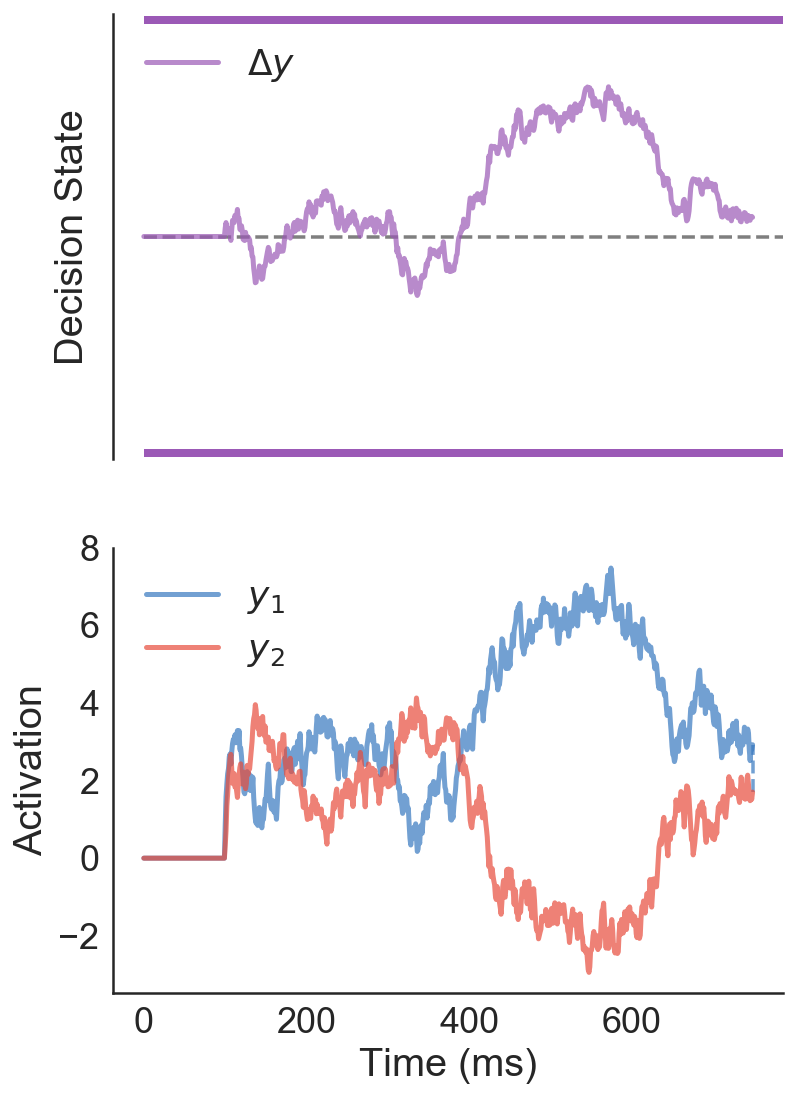

In [3]:
Z=10
y1, y2, rt, act = neural.LCA_Model(I1=7.5, I2=8., k=5, B=5, Z=Z, dt=.002, tau=.075, si=5)
dv = (y1-y2)/np.sqrt(2)
neural.plot_decision_dynamics(y1, y2, dv, Z=Z, label='lca')

## Adding neural plausibility

In [4]:
from ADMCode import load_attractor_animation
load_attractor_animation()

### Nonlinear effects of input current ($x$) on neural firing rate ($r$)

* **Bias** ($b$): current require for half maximum firing rate ($r_{max}$)
* **Gain** ($g$): sensitivity of current near levels of $b$

### $ x = I_1 + kX_1(t) - \beta X_2(t) $
### $ d r_i(t) = f(x(t)) dt/\tau + \sigma dW_i(t) $
### $ f(x) = \frac{r_{max}}{1+e^{-(x-b)/g}}$



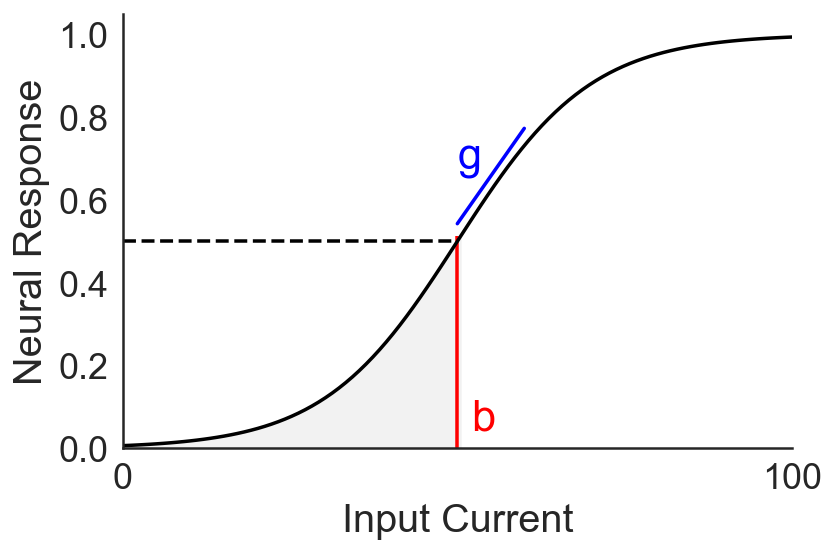

In [5]:
neural.plot_sigmoid_response(b=50, g=10)

## Attractor Parameters

In [6]:
rmax = 100
g=17
b=30
Z=35

I0 = 0.5
I1 = 10
I2 = 8.

B = 1.0
k = 1.2

dt = .001
tau = .075
si = 6.5

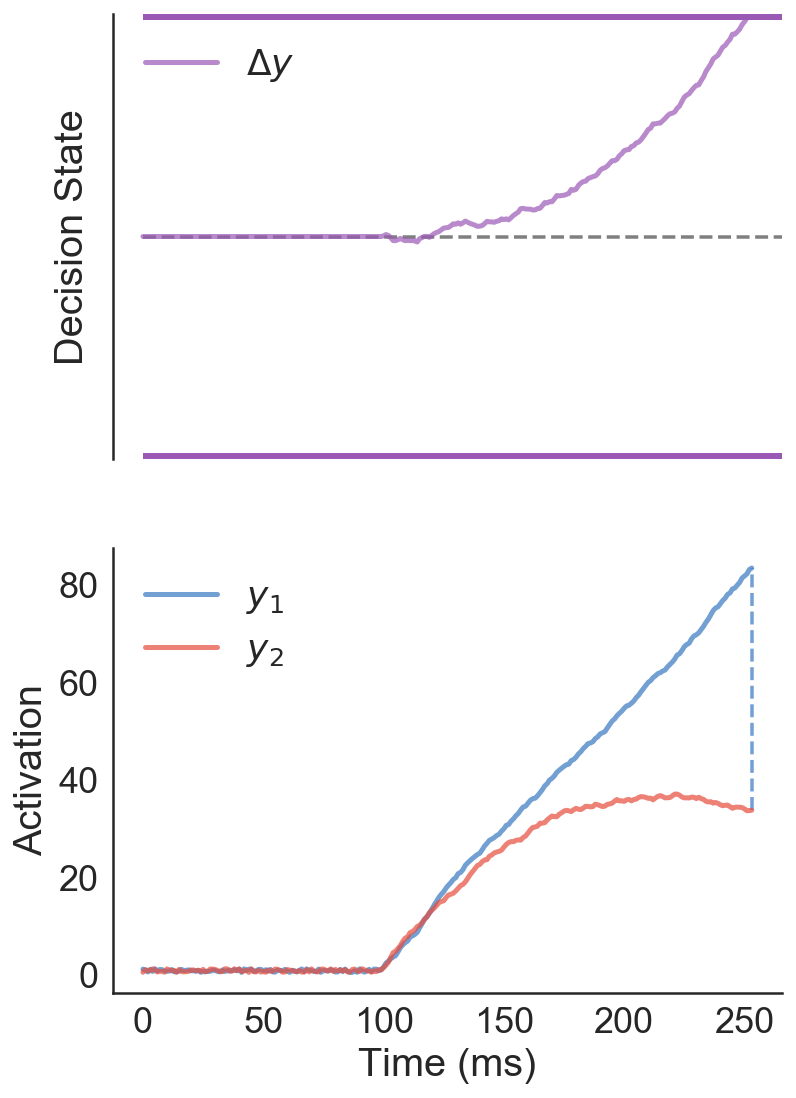

In [108]:
r1, r2, dv, rt = neural.attractor_network(I1=I1, I2=I2, I0=I0, k=k, B=B, g=g, b=b, rmax=rmax,  si=si, dt=dt, tau=tau, Z=Z)
neural.plot_decision_dynamics(r1=r1, r2=r2, dv=dv, Z=Z, label='attractor')

## Simulate SAT experiment

In [109]:
dfControl = neural.simulate_attractor_behavior(I1=10, I2=8.5, I0=2.5, k=1.3, B=1.3, ntrials=500)
print(dfControl.accuracy.mean())
print(dfControl.rt.mean())

0.778
299.786


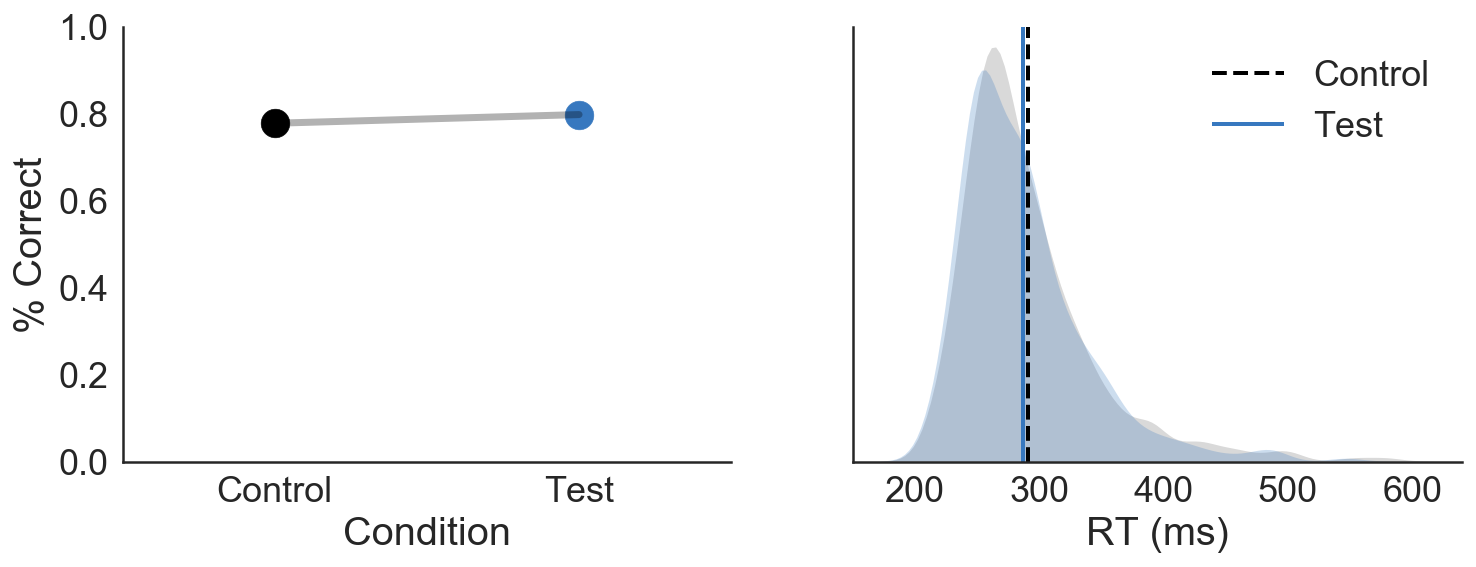

In [112]:
# manipulate the parameters below to improve 
# the speed and accuracy of behavior

I0=2.5 # background excitability
k=1.3  # recurrent feedback
B=1.3  # cross inhibition

dfTest = neural.simulate_attractor_behavior(I1=10, I2=8.5, I0=I0, k=k, B=B, ntrials=500)

# Compare Control and Test behavior
neural.SAT_experiment(dfControl, dfTest)

## Effect of noise depends on Input Strength ($I$)

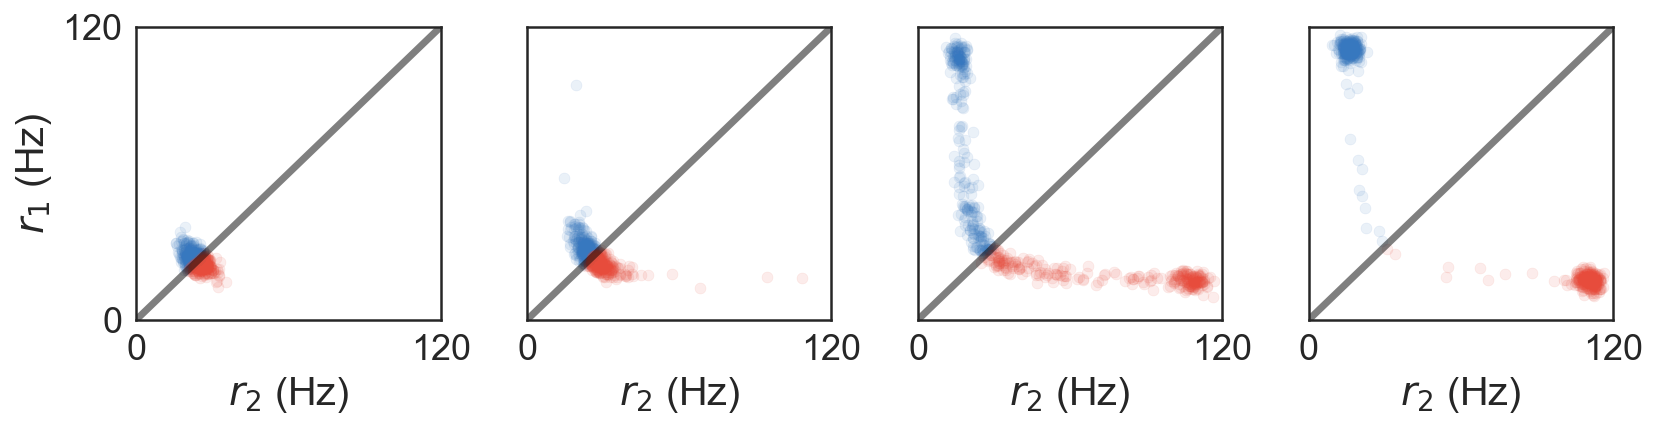

In [87]:
I = [1,5,10,15]
neural.noisy_attractor_endpoints(I=I, si=10, I0=0.01, dt=.005, k=1., B=1., g=20, b=50, ntrials=500)

## Attraction landscape over $I_1:I_2$ ratios

##  Noise-less attractor

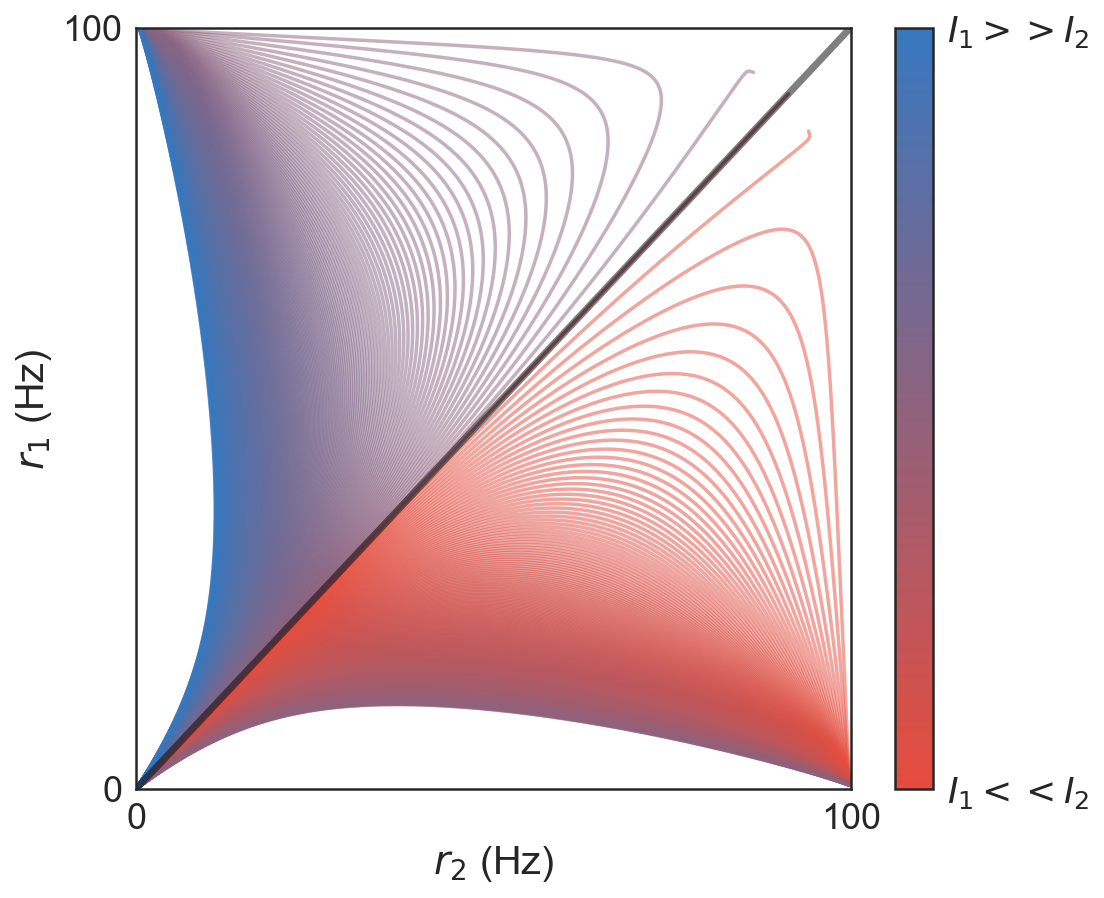

In [194]:
neural.simulate_attractor_competition(Imax=15, si=0, ntrials=500)

##  Increasing noise

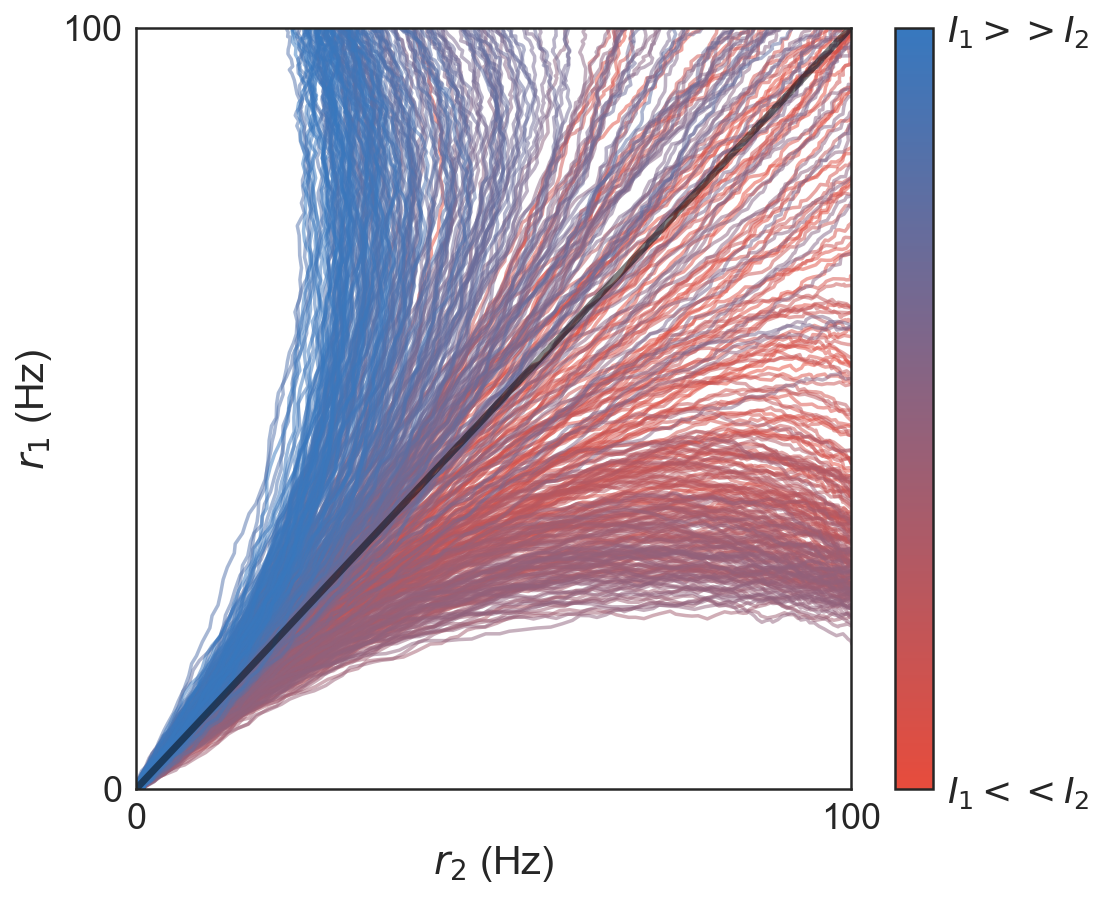

In [193]:
neural.simulate_attractor_competition(Imax=15, si=6, ntrials=500)

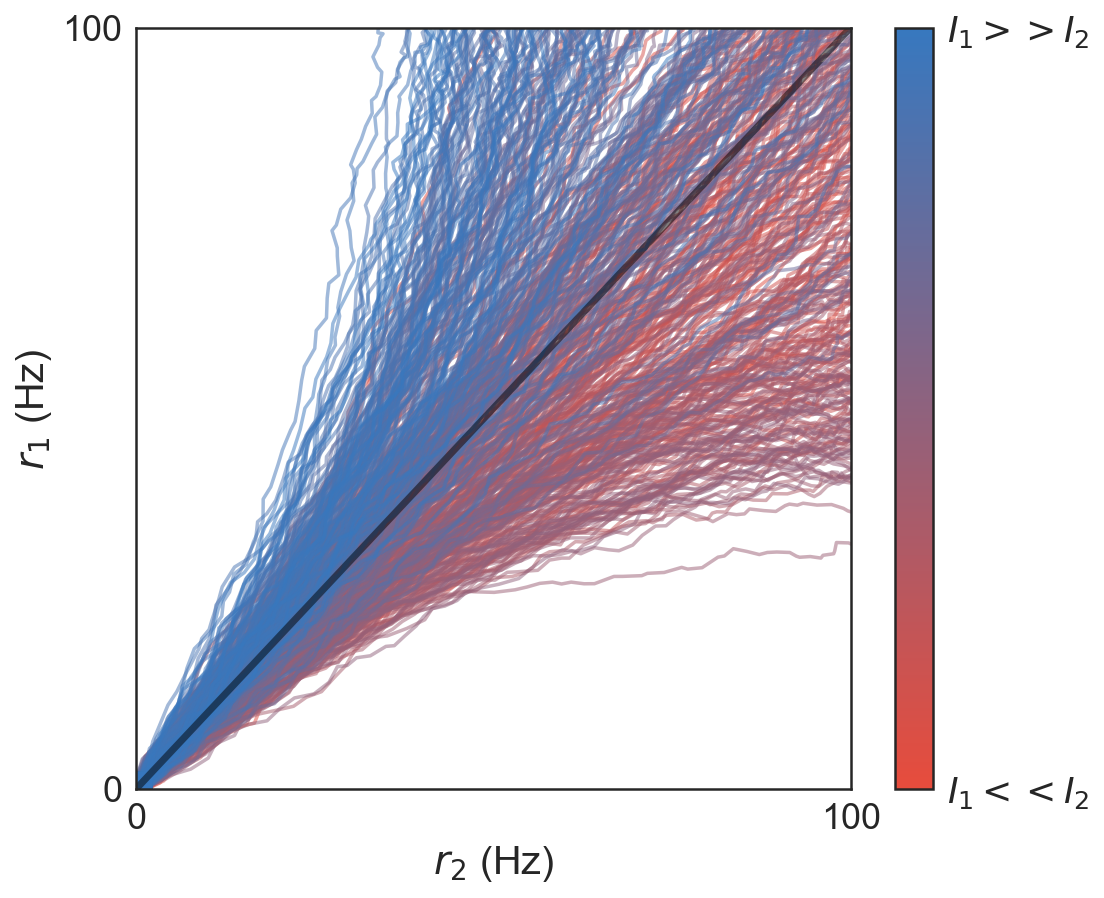

In [192]:
neural.simulate_attractor_competition(Imax=15, si=12, ntrials=500)